In [ ]:
import pandas as pd
import re


# Definir listas de valores de i e dp
i_values = [1, 2, 3, 4, 5]
dp_values = [5, 10, 15, 20, 25, 30, 40, 50]

# Criar uma lista para armazenar os dados
dados = []

# Iterar sobre os valores de i e dp
for i in i_values:
    for dp in dp_values:
        # Formatar o nome do arquivo com os valores de i e dp
        nome_arquivo = f"teste{i}_NA1000000_DP{dp}.out"

        # Ler o arquivo
        with open(nome_arquivo, 'r') as arquivo:
            # Ler as linhas do arquivo
            linhas = arquivo.readlines()

            # Extrair os dados de cada linha
            for linha in linhas:
                # Remover caracteres de espaço em branco no início e no final da linha
                linha = linha.strip()

                # Dividir a linha em colunas separadas pelo caractere de tabulação
                colunas = linha.split('\t')

                # Extrair os valores de interesse
                modelo = colunas[0]
                total_page_miss = float(colunas[1].replace('%', ''))
                numeros = re.findall(r'\d+', linha)
                interrupcoes = int(numeros[2])
                acessos_RAM = int(numeros[3])
                armazenamento_HD = int(numeros[4])

                # Adicionar os dados à lista
                dados.append([i, dp, modelo, total_page_miss, interrupcoes, acessos_RAM, armazenamento_HD])

# Criar o data set utilizando o pandas
df = pd.DataFrame(dados, columns=['Teste', 'DP', 'Modelo', 'Total_Page_Miss', 'Interrupcoes', 'Acessos_RAM', 'Armazenamento_HD'])




In [ ]:
df.head()

,Teste,DP,Modelo,Total_Page_Miss,Interrupcoes,Acessos_RAM,Armazenamento_HD
0,1,5,NUR,0.219,245,10977856,0
1,1,5,NUR_FC,0.520,245,8032352,0
2,1,5,MRU,6.483,245,267559488,28955
3,1,5,MRU_AGING,0.276,245,13292096,440
4,1,5,FIFO,0.253,245,1000000,409


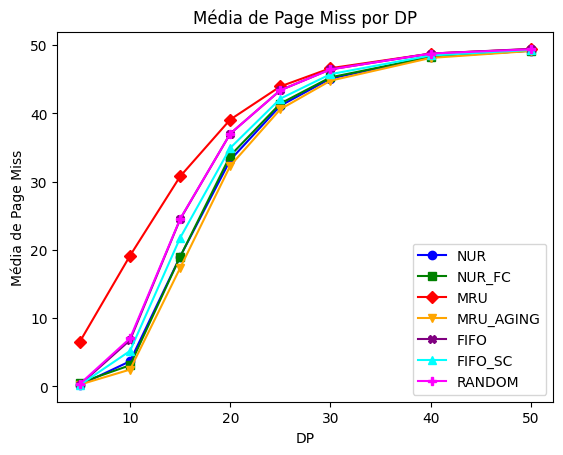

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar a formatação da coluna "Modelo"
df['Modelo'] = df['Modelo'].str.strip()

# Calcular a média dos valores de page miss agrupados por DP e modelo
media_page_miss = df.groupby(['DP', 'Modelo'])['Total_Page_Miss'].mean().reset_index()

# Definir os modelos a serem plotados
modelos = ['NUR', 'NUR_FC', 'MRU', 'MRU_AGING', 'FIFO', 'FIFO_SC', 'RANDOM']

# Configurar as cores e marcadores para cada modelo
cores = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']
marcadores = ['o', 's', 'D', 'v', 'X', '^', 'P']

# Plotar o gráfico
fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    dados_modelo = media_page_miss[media_page_miss['Modelo'] == modelo]
    ax.plot(dados_modelo['DP'], dados_modelo['Total_Page_Miss'], marker=marcadores[i], color=cores[i], label=modelo)

# Configurar o título e os rótulos dos eixos
ax.set_title('Média de Page Miss por DP')
ax.set_xlabel('DP')
ax.set_ylabel('Média de Page Miss')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()


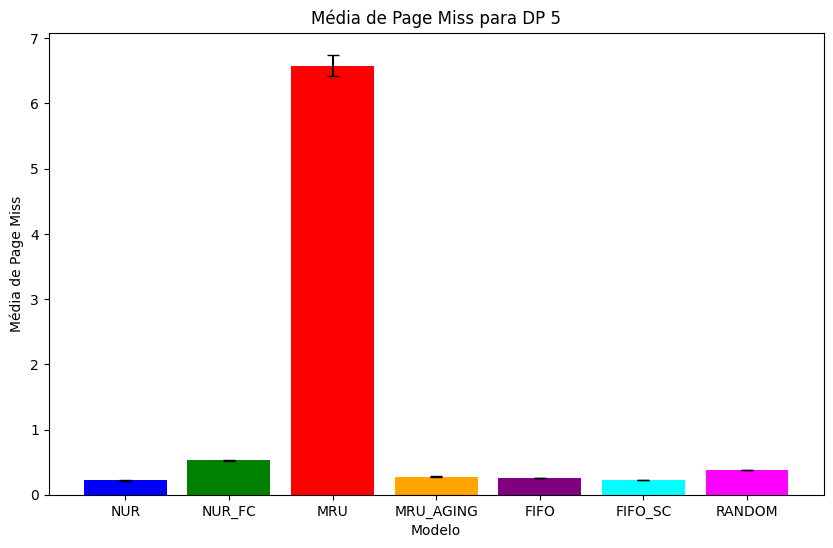

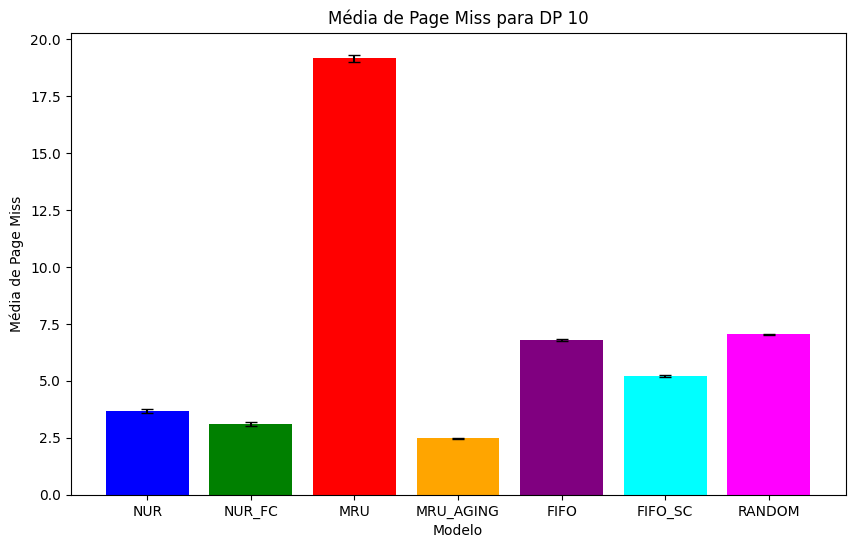

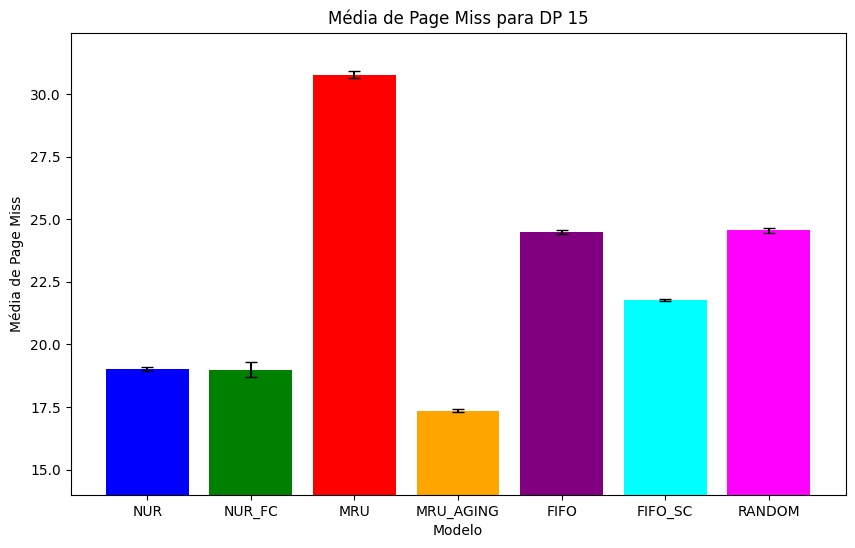

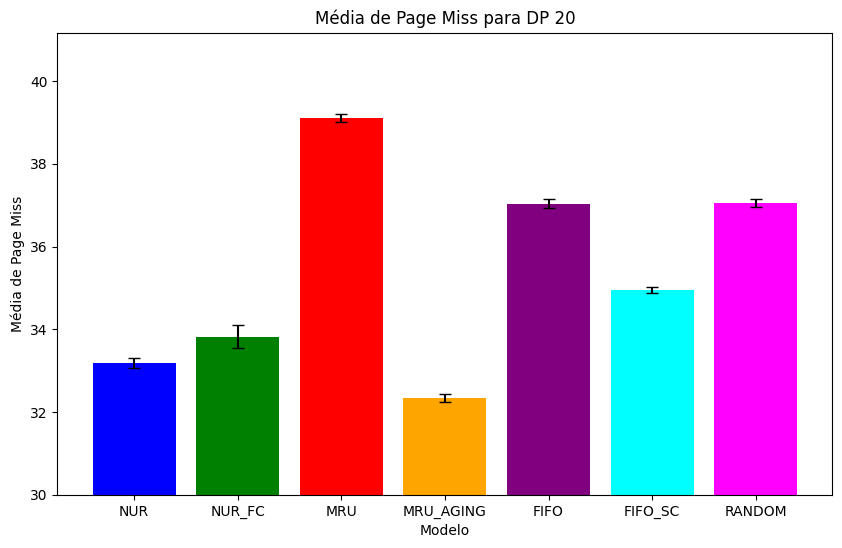

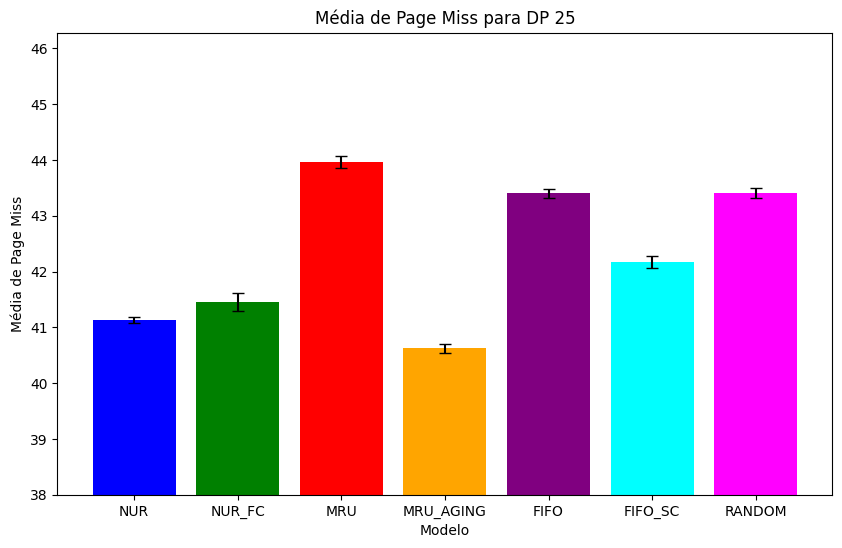

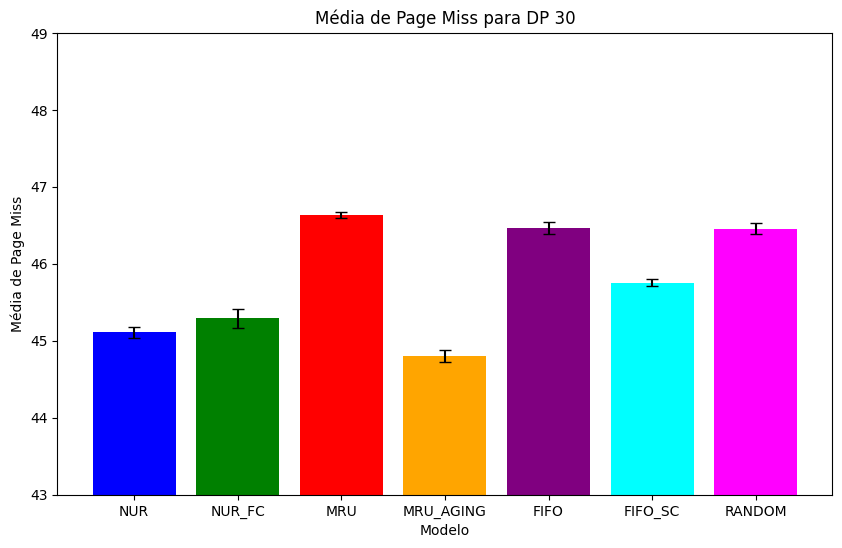

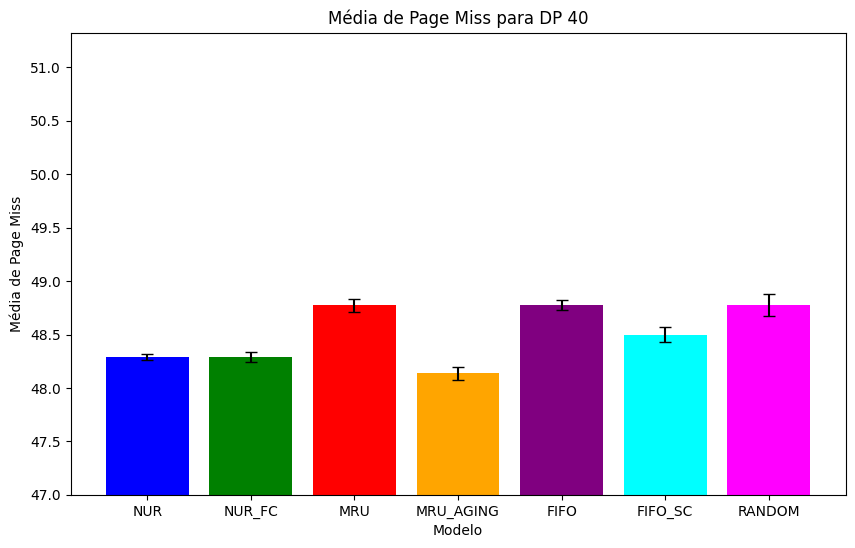

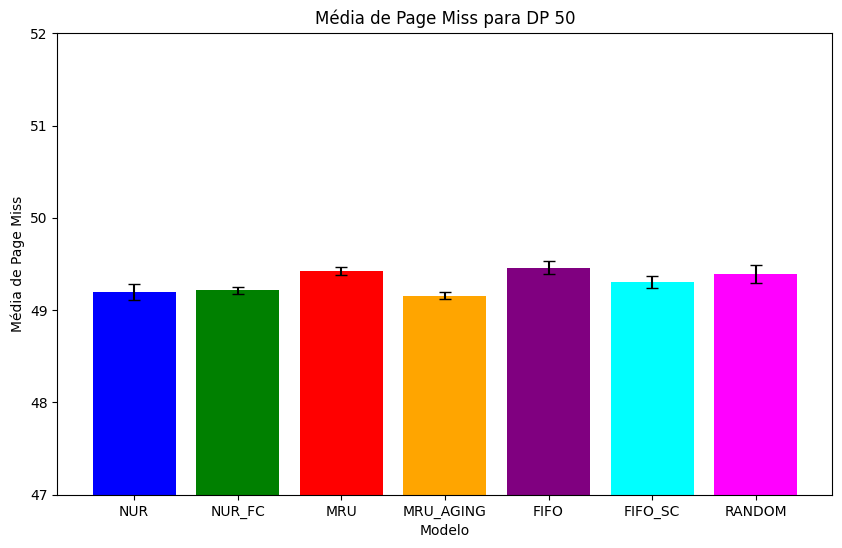

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar a formatação da coluna "Modelo"
df['Modelo'] = df['Modelo'].str.strip()

# Calcular a média dos valores de page miss agrupados por DP, modelo e teste
media_page_miss = df.groupby(['DP', 'Modelo', 'Teste'])['Total_Page_Miss'].mean().reset_index()

# Definir os modelos a serem plotados
modelos = ['NUR', 'NUR_FC', 'MRU', 'MRU_AGING', 'FIFO', 'FIFO_SC', 'RANDOM']

# Configurar as cores para cada modelo
cores = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

# Iterar sobre os valores de DP
for dp in media_page_miss['DP'].unique():
    # Filtrar os dados para o valor de DP atual
    dados_dp = media_page_miss[media_page_miss['DP'] == dp]

    # Calcular as médias de Page Miss e os intervalos de confiança para cada modelo
    medias_modelo = []
    intervalos_confianca_modelo = []
    for modelo in modelos:
        dados_modelo = dados_dp[dados_dp['Modelo'] == modelo]['Total_Page_Miss']
        media_modelo = dados_modelo.mean()
        menor_valor = dados_modelo.min()
        maior_valor = dados_modelo.max()
        intervalo_confianca = (maior_valor - menor_valor) / 2  # Intervalo de confiança
        medias_modelo.append(media_modelo)
        intervalos_confianca_modelo.append(intervalo_confianca)

    # Plotar o gráfico de barras com os intervalos de confiança para o valor de DP atual
    plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura conforme necessário
    plt.bar(modelos, medias_modelo, color=cores, yerr=intervalos_confianca_modelo, capsize=4)
    plt.xlabel('Modelo')
    plt.ylabel('Média de Page Miss')
    plt.title(f'Média de Page Miss para DP {dp}')

    if dp == 15:
      plt.ylim(bottom=14)
    elif dp == 20:
      plt.ylim(bottom=30)
    elif dp == 25:
      plt.ylim(bottom=38)
    elif dp == 30:
      plt.ylim(bottom=43)
    elif dp >= 40:
      plt.ylim(bottom=47)

    plt.show()


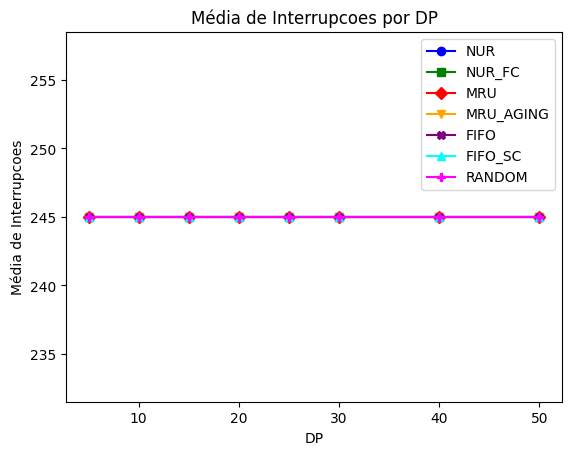

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar a formatação da coluna "Modelo"
df['Modelo'] = df['Modelo'].str.strip()

# Calcular a média dos valores de page miss agrupados por DP e modelo
media_page_miss = df.groupby(['DP', 'Modelo'])['Interrupcoes'].mean().reset_index()

# Definir os modelos a serem plotados
modelos = ['NUR', 'NUR_FC', 'MRU', 'MRU_AGING', 'FIFO', 'FIFO_SC', 'RANDOM']

# Configurar as cores e marcadores para cada modelo
cores = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']
marcadores = ['o', 's', 'D', 'v', 'X', '^', 'P']

# Plotar o gráfico
fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    dados_modelo = media_page_miss[media_page_miss['Modelo'] == modelo]
    ax.plot(dados_modelo['DP'], dados_modelo['Interrupcoes'], marker=marcadores[i], color=cores[i], label=modelo)

# Configurar o título e os rótulos dos eixos
ax.set_title('Média de Interrupcoes por DP')
ax.set_xlabel('DP')
ax.set_ylabel('Média de Interrupcoes')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()


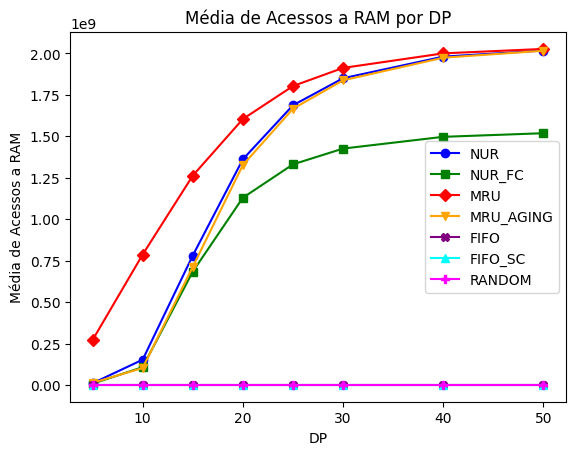

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar a formatação da coluna "Modelo"
df['Modelo'] = df['Modelo'].str.strip()

# Calcular a média dos valores de page miss agrupados por DP e modelo
media_page_miss = df.groupby(['DP', 'Modelo'])['Acessos_RAM'].mean().reset_index()

# Definir os modelos a serem plotados
modelos = ['NUR', 'NUR_FC', 'MRU', 'MRU_AGING', 'FIFO', 'FIFO_SC', 'RANDOM']

# Configurar as cores e marcadores para cada modelo
cores = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']
marcadores = ['o', 's', 'D', 'v', 'X', '^', 'P']

# Plotar o gráfico
fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    dados_modelo = media_page_miss[media_page_miss['Modelo'] == modelo]
    ax.plot(dados_modelo['DP'], dados_modelo['Acessos_RAM'], marker=marcadores[i], color=cores[i], label=modelo)

# Configurar o título e os rótulos dos eixos
ax.set_title('Média de Acessos a RAM por DP')
ax.set_xlabel('DP')
ax.set_ylabel('Média de Acessos a RAM')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

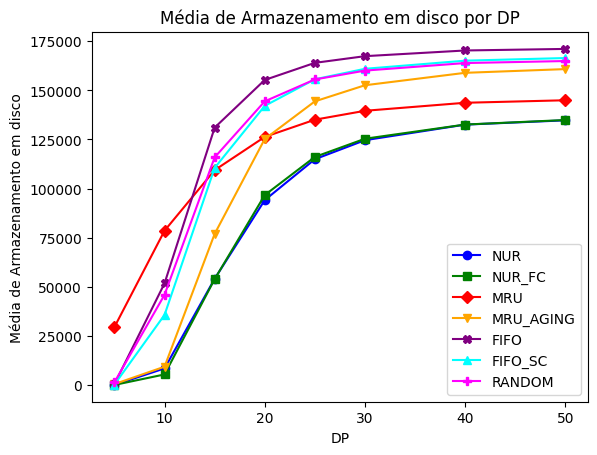

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar a formatação da coluna "Modelo"
df['Modelo'] = df['Modelo'].str.strip()

# Calcular a média dos valores de page miss agrupados por DP e modelo
media_page_miss = df.groupby(['DP', 'Modelo'])['Armazenamento_HD'].mean().reset_index()

# Definir os modelos a serem plotados
modelos = ['NUR', 'NUR_FC', 'MRU', 'MRU_AGING', 'FIFO', 'FIFO_SC', 'RANDOM']

# Configurar as cores e marcadores para cada modelo
cores = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']
marcadores = ['o', 's', 'D', 'v', 'X', '^', 'P']

# Plotar o gráfico
fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    dados_modelo = media_page_miss[media_page_miss['Modelo'] == modelo]
    ax.plot(dados_modelo['DP'], dados_modelo['Armazenamento_HD'], marker=marcadores[i], color=cores[i], label=modelo)

# Configurar o título e os rótulos dos eixos
ax.set_title('Média de Armazenamento em disco por DP')
ax.set_xlabel('DP')
ax.set_ylabel('Média de Armazenamento em disco')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()